<a href="https://colab.research.google.com/github/sungsujaing/TFHub_StyleTransfer/blob/master/StyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install --upgrade tensorflow

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow_hub as tf_hub
%matplotlib inline
style_transfer_TFHub_URL = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1'

In [262]:
print(f'tf version: {tf.__version__}')

tf version: 2.0.0


In [0]:
def load_preprocessing_img(path):
  '''
  preprocess the image array into a normalized 4-D tensor to feed to the model provided by TF_Hub
  '''
  dim_thresh = 512
  img = cv2.imread(path)
  img = img.astype('float32')
  img /= 255.
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  scale = dim_thresh/max(img.shape)
  scaled = (int(img.shape[1]*scale),int(img.shape[0]*scale))
  img = cv2.resize(img,scaled)
  img = tf.convert_to_tensor(img)
  img = img[tf.newaxis,:]
  return img

In [0]:
content = load_preprocessing_img('sean.jpg')
style = load_preprocessing_img('monalisa-by-da-vinci.jpg')

In [276]:
print('content size: {}'.format(content.shape))
print('style size: {}'.format(style.shape))

content size: (1, 512, 380, 3)
style size: (1, 512, 340, 3)


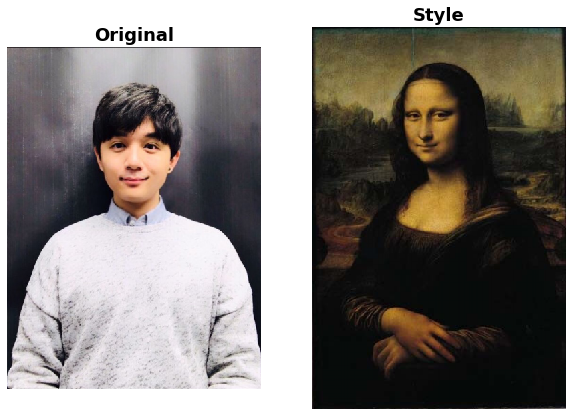

In [277]:
fig,axes = plt.subplots(1,2,figsize=(10,10))
for ax,img,title in zip(axes,[content,style],['Original','Style']):
  ax.imshow(img[0])
  ax.axis('off')
  ax.set_title(title,fontsize=18,fontweight='bold')

In [0]:
hub_module = tf_hub.load(style_transfer_TFHub_URL)
result = hub_module(tf.constant(content),tf.constant(style))[0]

In [0]:
def tensor_to_array(tensor):
  tensor = tensor * 255
  array = tensor.numpy().astype(int)
  array = array[0]
  return array

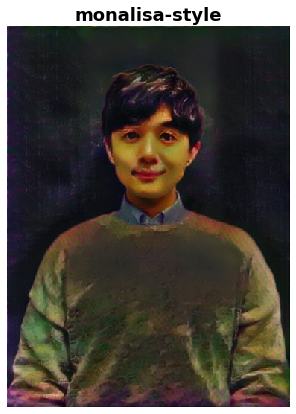

In [280]:
plt.figure(figsize=(7,7))
plt.imshow(tensor_to_array(result))
plt.title('monalisa-style',fontsize=18,fontweight='bold')
plt.axis('off')
plt.show()

In [0]:
s
style = load_preprocessing_img('monalisa-by-da-vinci.jpg')